### **Context:**



Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process \(real time\) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.



### **Objective:**



- This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable\(s\).
- To build a Python Flask ML application where a user have to sign up by entering the username and password and login to the website and then enter their details to check whether the loan application will get approved or not.



### **Dataset Information:**



**Dataset Source:** [https://www.kaggle.com/datasets/ssiddharth408/loan\-prediction\-dataset](https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset) 


- **Loan\_ID**: Unique Loan ID
- **Gender**: Male/ Female
- **Married**: Applicant married \(Y/N\)
- **Dependents**: Number of dependents
- **Education**: Applicant Education \(Graduate/ Under Graduate\)
- **Self\_Employed**: Self employed \(Y/N\)
- **ApplicantIncome**: Applicant income \(in dollars\)
- **CoapplicantIncome**: Co\-applicant income \(in dollars\)
- **LoanAmount**: Loan amount in thousands \(in dollars\)
- **Loan\_Amount\_Term**: Term of loan in months
- **Credit\_History**: credit history meets guidelines
- **Property\_Area**: Urban/ Semi Urban/ Rural
- **Loan\_Status** \(Target\): Loan approved \(Y/N\)



### **Model Building and Pickling**



### 1. Import required libraries and read the dataset.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.



In [4]:
# Checking the shape of dataset

df.shape

(614, 13)

- The dataset consists of 614 records and 13 columns.



In [5]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.



In [6]:
# Determining the % of the missing values in each column.
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- We can observe that columns **'gender', 'married', 'dependents', 'self\_employed', 'loanamount', 'loan\_amount\_term', 'credit\_history'**  have missing data.



In [7]:
# Using median imputation for numerical columns 

for col in ['dependents','loanamount','loan_amount_term','credit_history']:
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
# Using mode imputation for categorical columns

for col in ['gender','married','self_employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
# Rechecking the % of the missing values in each column after imputation.

df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

- No more missing values left in dataset.



In [10]:
# Dropping redundant columns

df.drop('loan_id',axis=1,inplace=True)
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 4. Visualize the distribution of the target column 'loan\_status' with respect to various categorical features and write your observations.



In [11]:
# Getting details of categorical columns in dataset

df.describe(include='O')

,gender,married,education,self_employed,property_area,loan_status
count,614,614,614,614,614,614
unique,2,2,2,2,3,2
top,male,yes,graduate,no,semiurban,y
freq,502,401,480,532,233,422


In [12]:
# Creating a list of all the categorical columns (excluding he target 'loan_status' column)

cat_columns = df[['gender', 'married', 'education', 'self_employed', 'property_area']]

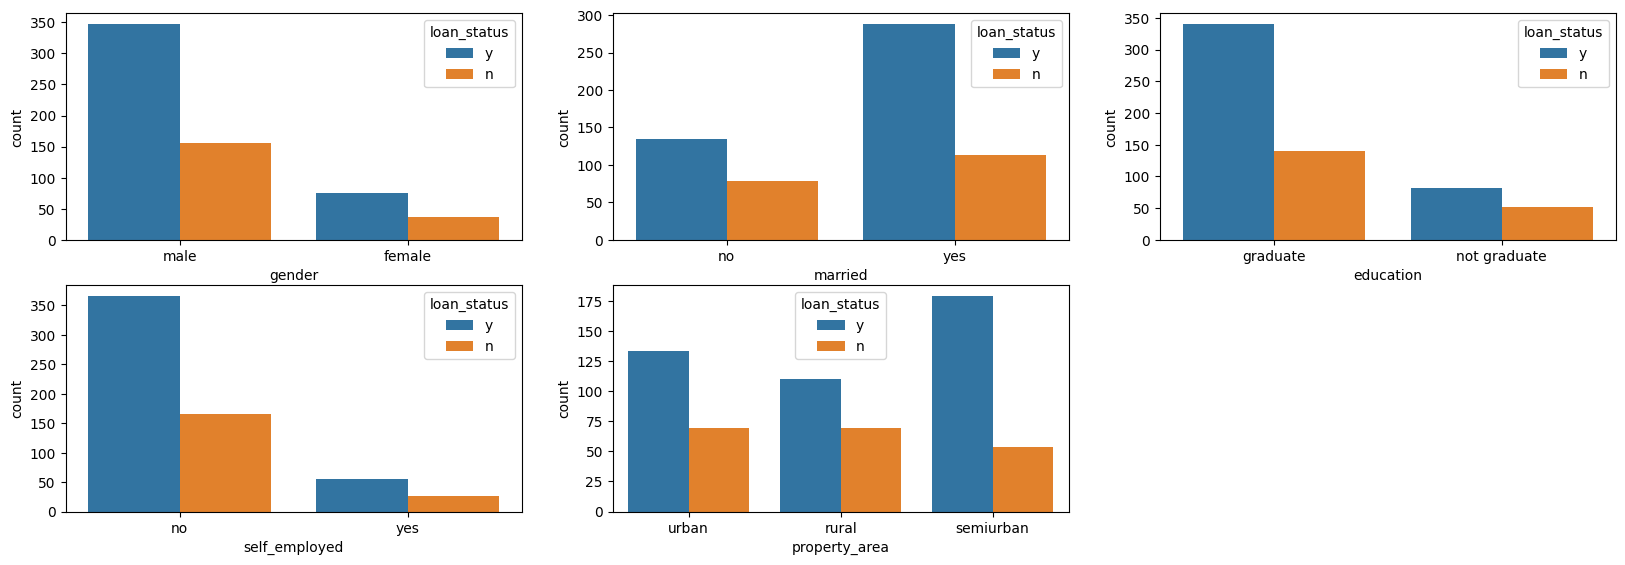

In [13]:
# Visualizing the distribution of target 'loan_status' with respect to other categorical columns in dataset

i = 1
plt.figure(figsize = (20,10))
for feature in cat_columns:
    plt.subplot(3,3,i)
    sns.countplot(x = feature,hue = 'loan_status' , data = df)
    i +=1

Observation from the above visual plots:

- Male applicants have a higher probability of being grant a loan than female applicants.
- Married people have a higher probability of getting a loan approved.
- Graduates also command a much higher rate of approval for loans than non\-graduates.
- Self\-employed applicants have a much lower chance of getting loan approved.
- People located in semi\-urban areas have the highest chance of getting a loan approved followed by urban and rural areas.



### 5. Encode the categorical data.



In [14]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [15]:
# The target column 'loan_status' consists of only 2 unique values i.e. 'y' and 'n' 
# We will manually encode it with parameters 'y': 1 and 'n':0

df['loan_status'] = df['loan_status'].replace({'y':1,'n':0})
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [16]:
# Encoding independent categoricals variables

# Checking the no. of unique values in each categorical column to determine the ncoding method required
cat_columns.nunique()

gender           2
married          2
education        2
self_employed    2
property_area    3
dtype: int64

In [17]:
# Since no. of unique values in all categorical columns is 2-3 we can encode them manually

df['gender'] = df['gender'].replace({'male':1, 'female':0})
df['married'] = df['married'].replace({'yes':1,'no':0})
df['self_employed'] = df['self_employed'].replace({'yes':1,'no':0})
df['property_area'] = df['property_area'].replace({'rural':0,'urban':1, 'semiurban':2})
df['education'] = df['education'].replace({'graduate':1, 'not graduate':0})

In [18]:
# Dataset after encoding
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


### 6. Separate the target and independent features and split the data into train and test.



In [19]:
# Separating the target ('loan_status') and independent variables

X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [20]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
1    68.729642
0    31.270358
Name: proportion, dtype: float64

In [21]:
# Splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.



In [22]:
# We use the simple Adaptive Boosting Classifier model

ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [23]:
# Determing the accuracy of our model to see its performance

y_train_pred = ab.predict(X_train)
y_test_pred = ab.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 0.8391608391608392
accuarcy test 0.8162162162162162


In [24]:
# Confusion matrix using test data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=ab.classes_)

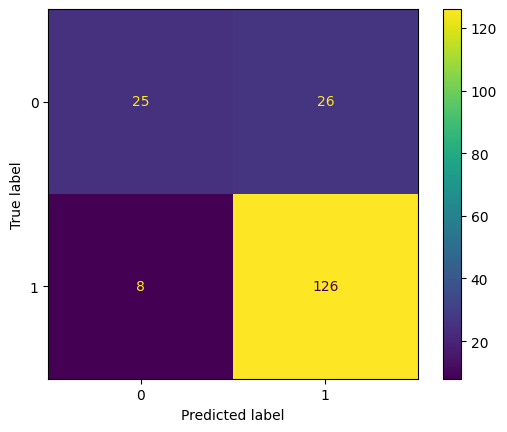

In [25]:
# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()
plt.show()

- From the above plot, we can observe that the model is overfitting due to imbalance in the target class.
- We can further improve the model by building tuning the hyperparameters.



#### Pickling \- Creating a pickle file with an extension as .pkl



In [26]:
# Saving our model into a Pickle (.pkl) file

import pickle
pickle.dump(ab, open('model.pkl','wb'))

### 8. Screenshots of App.

- App code running in VS

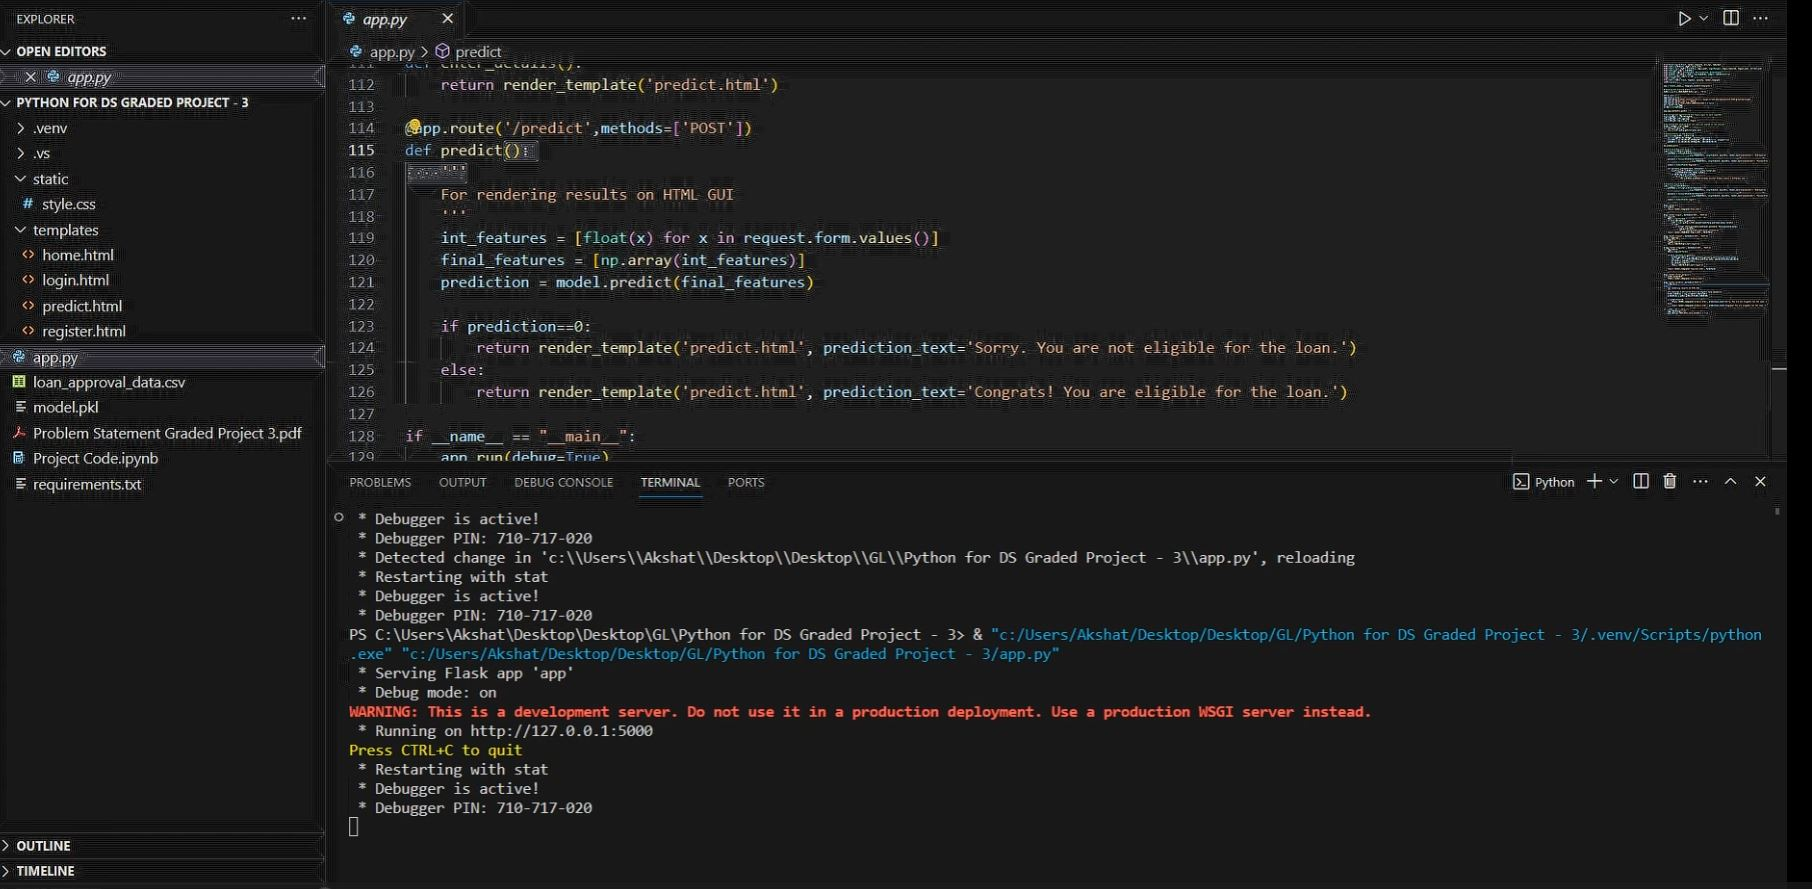

- Home Screen

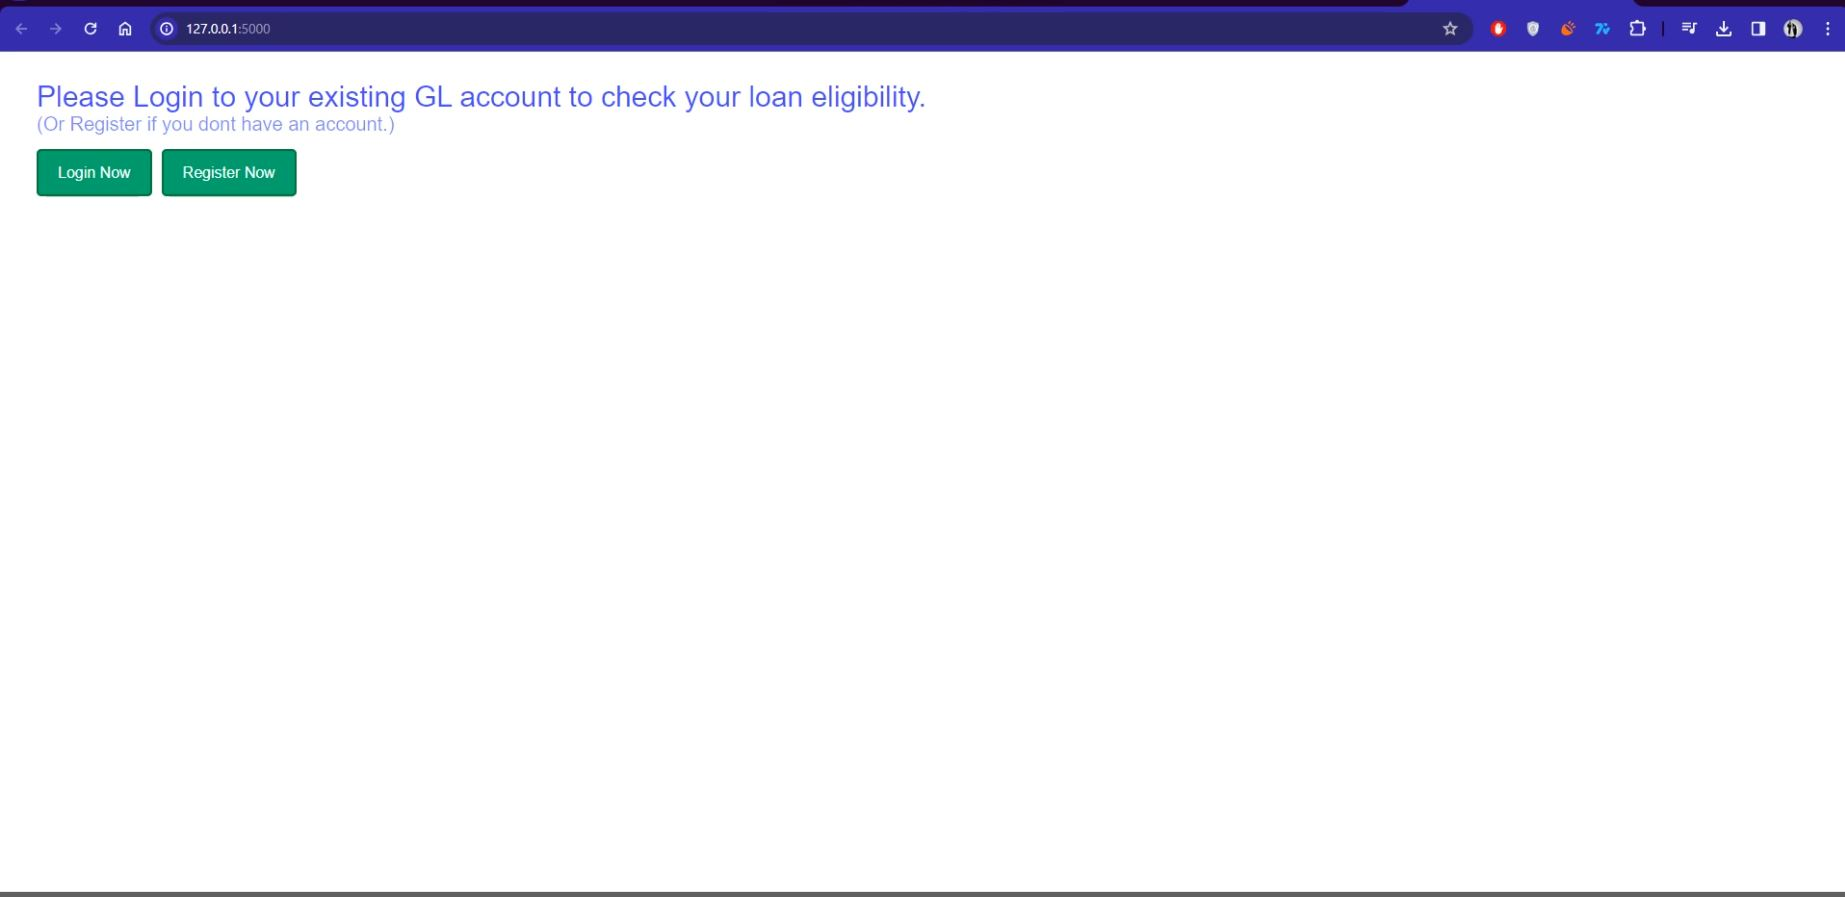

- Register Screen

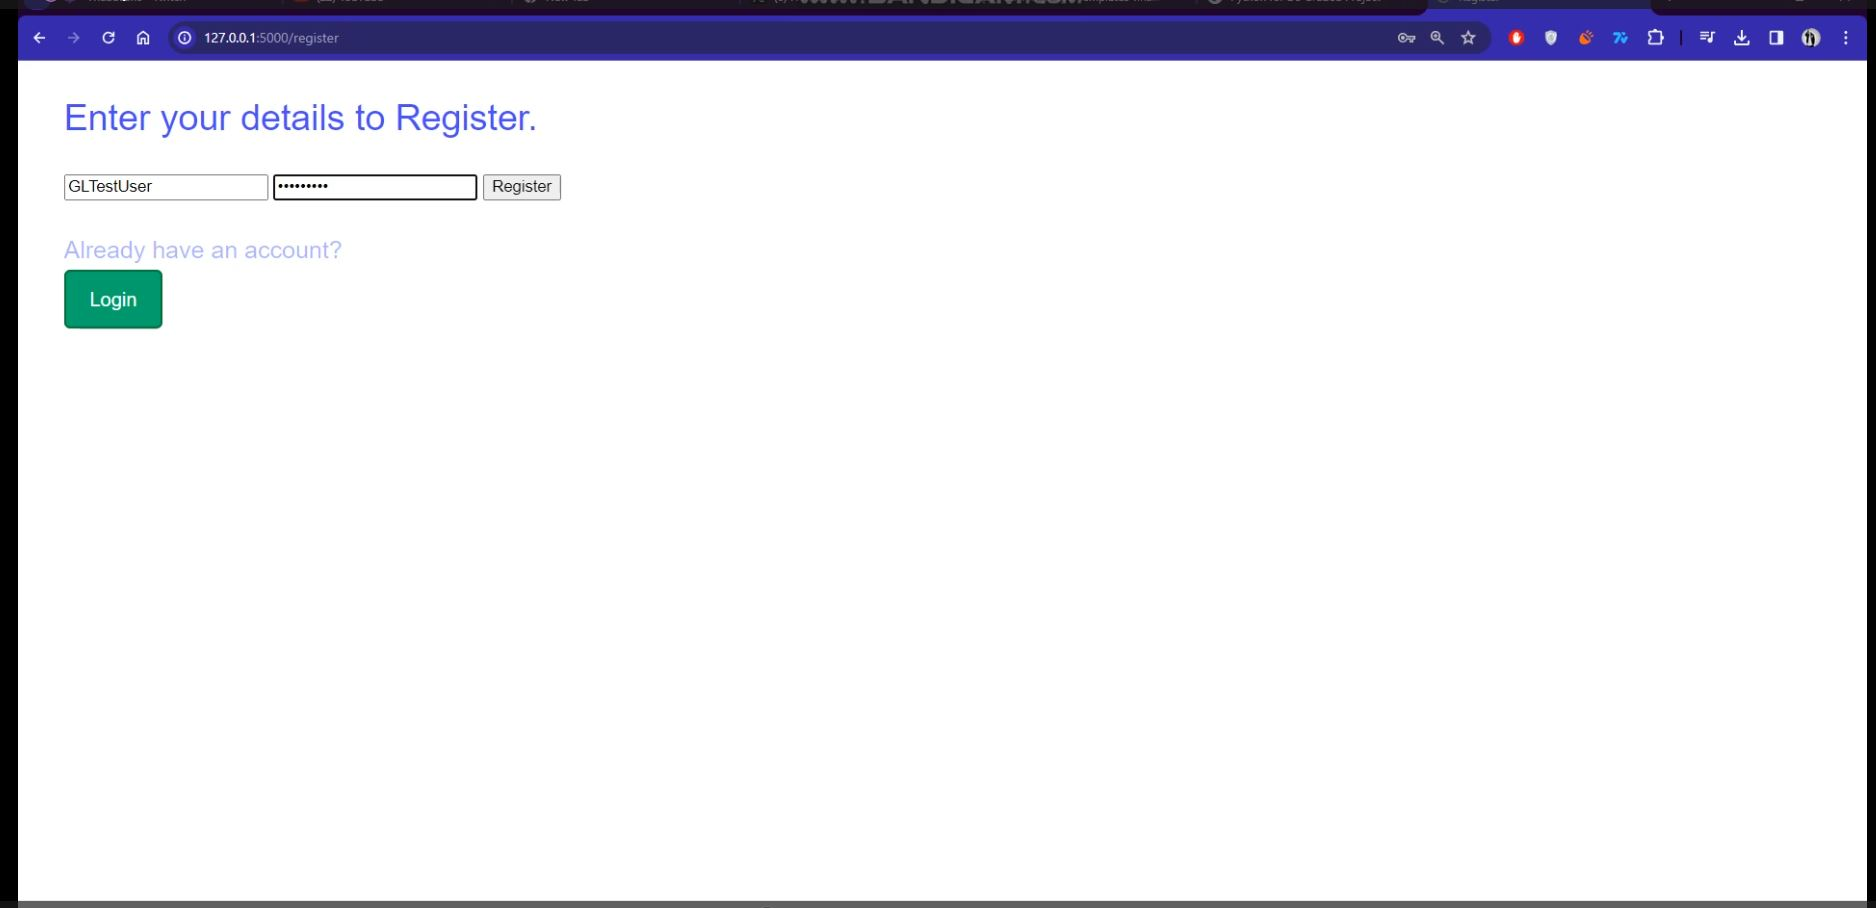

- Registration data saved in User table in DB on the MySql server

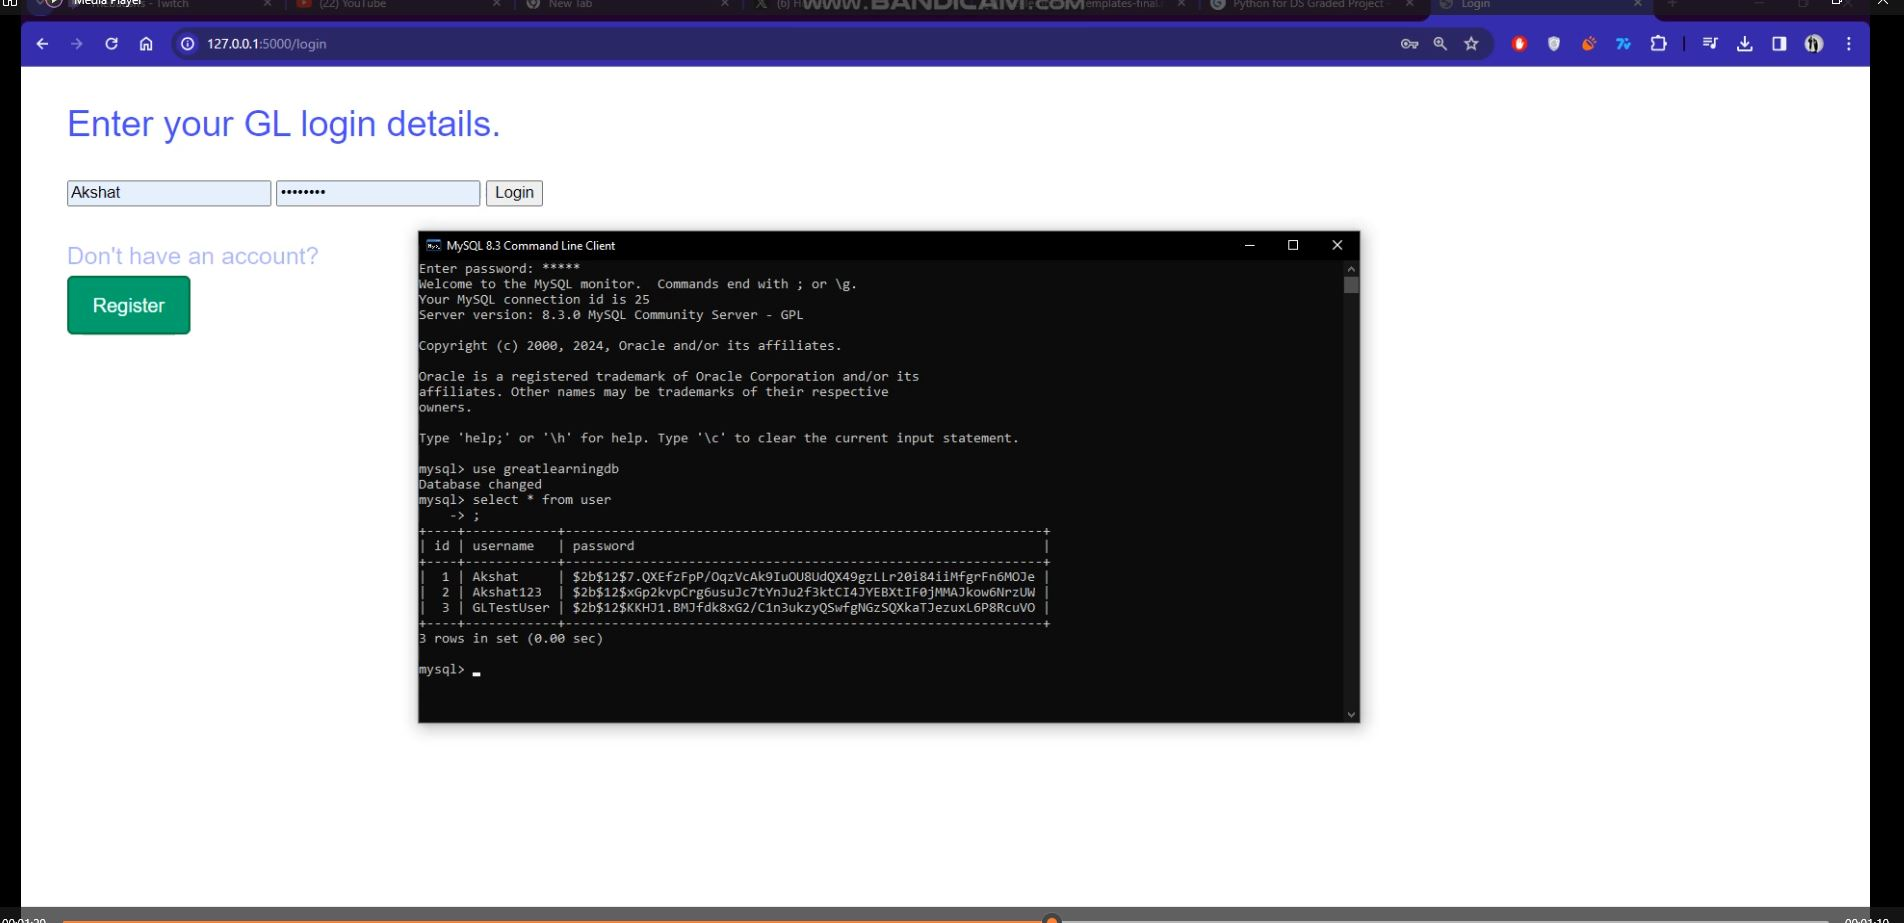

- Login Screen

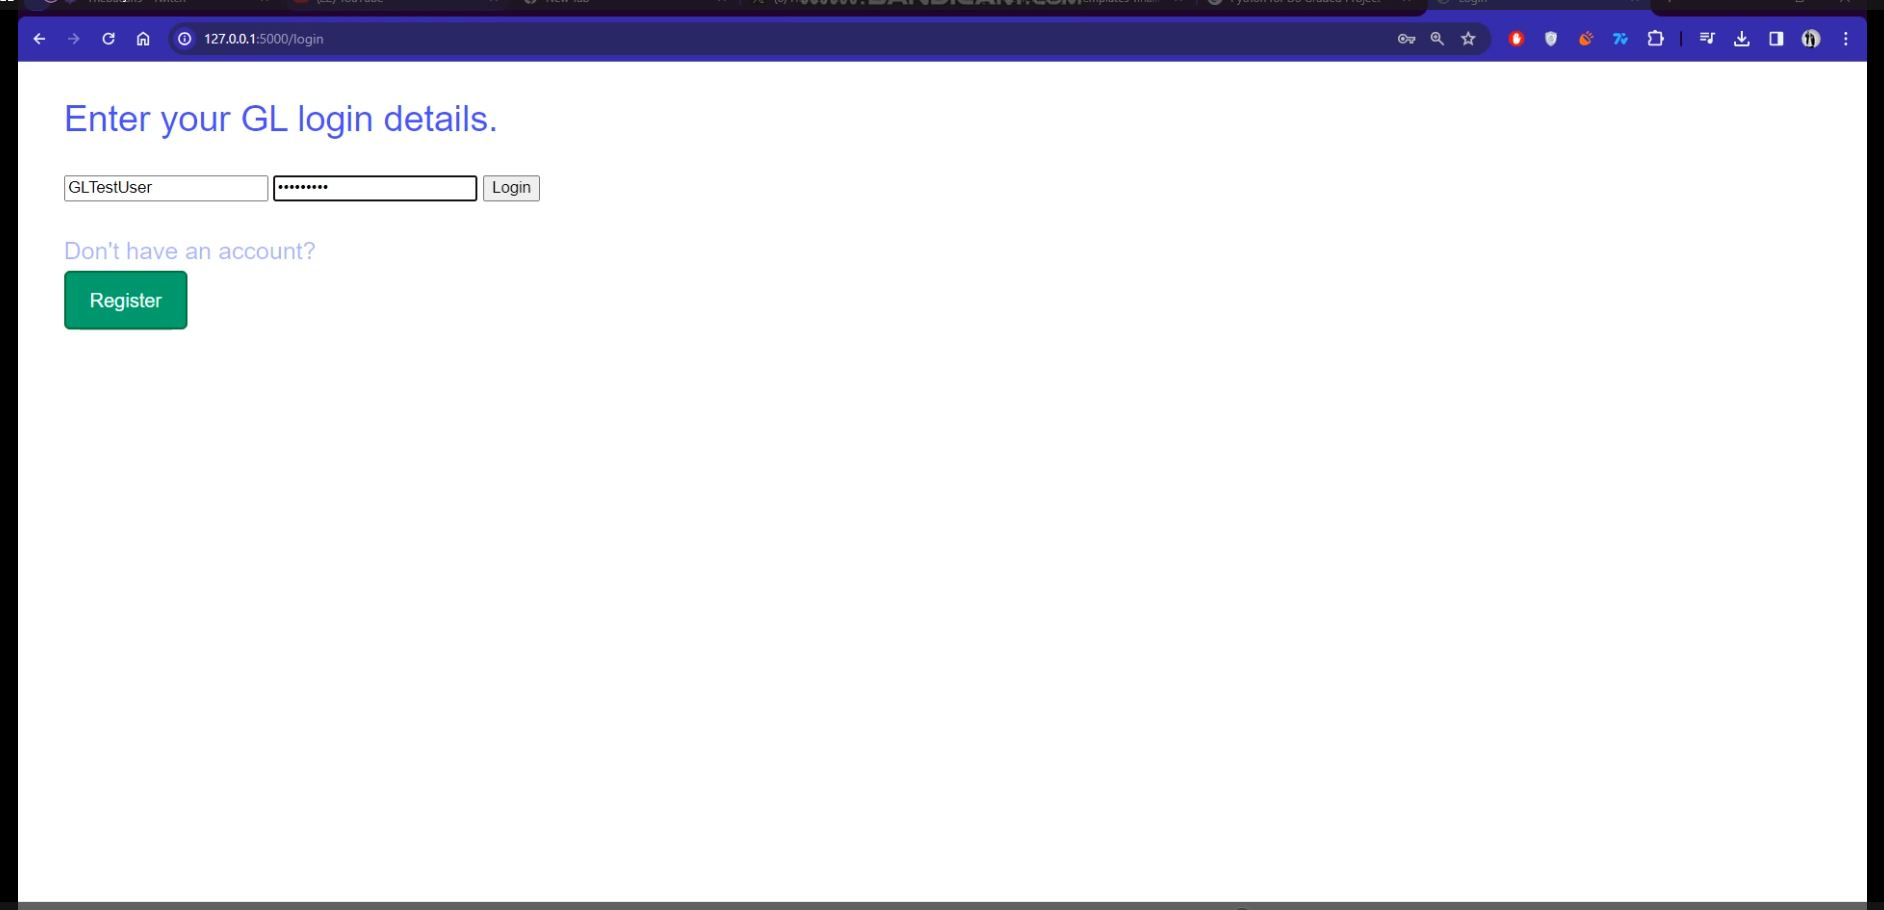

- Loan Prediction form

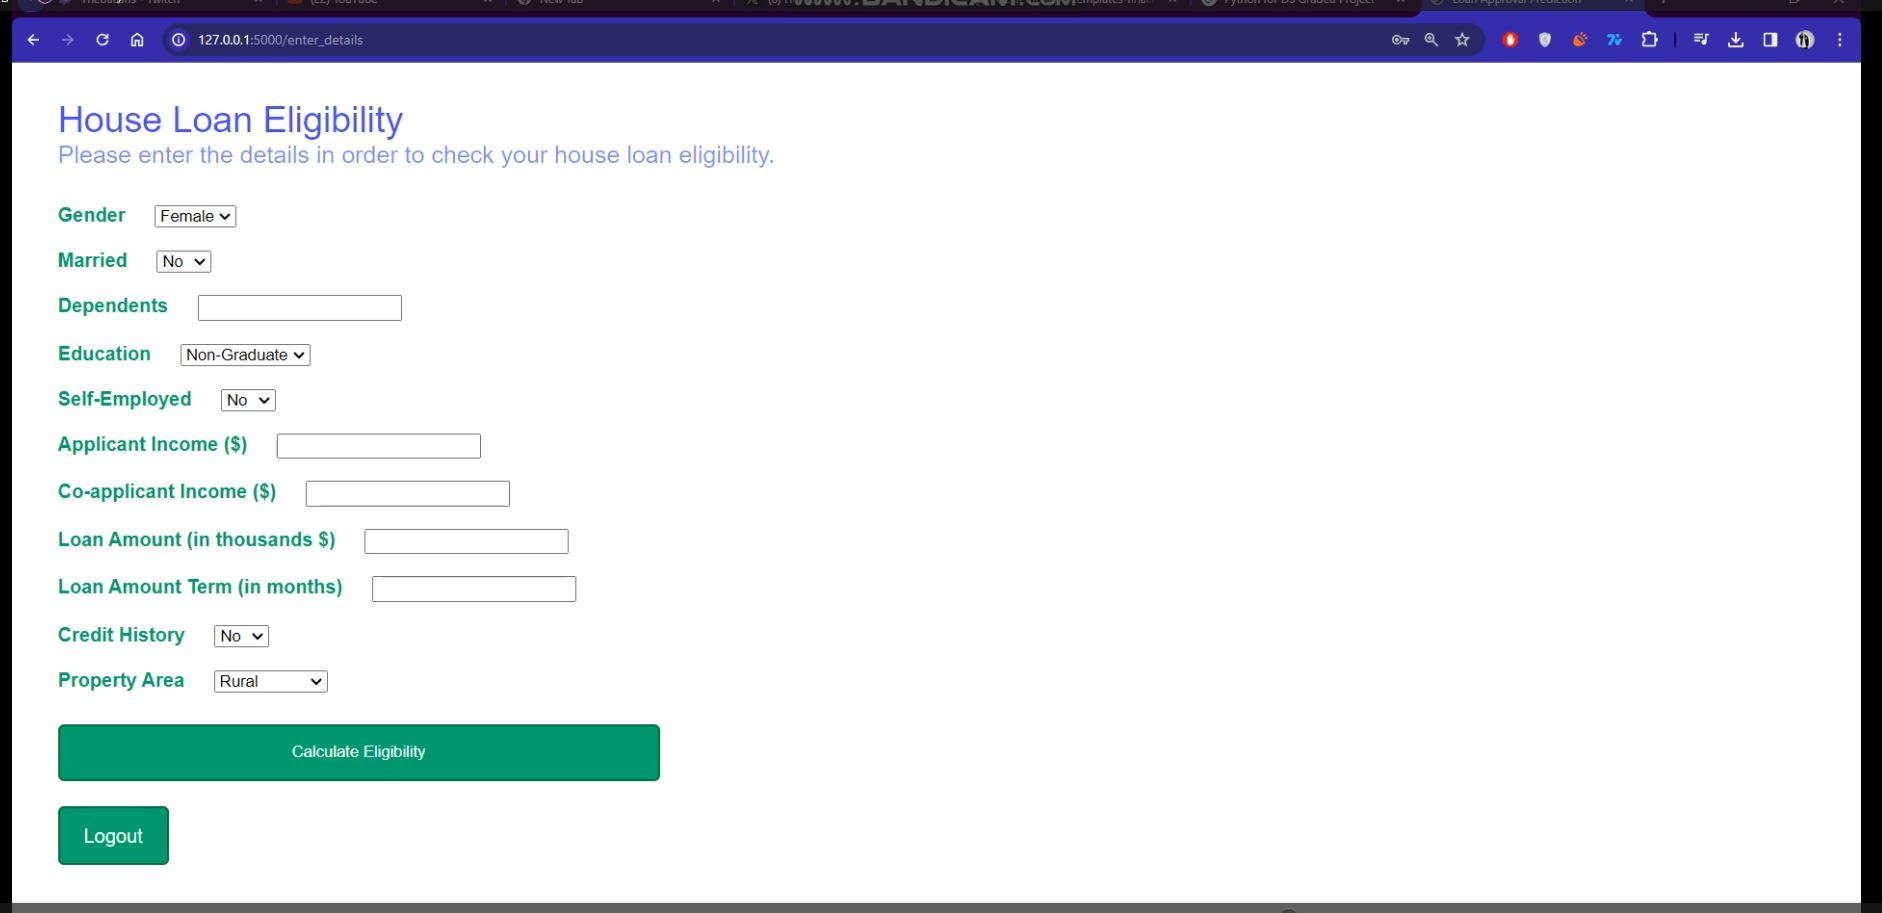

- Prediction of loan approval on the basis of our model and the input form fields

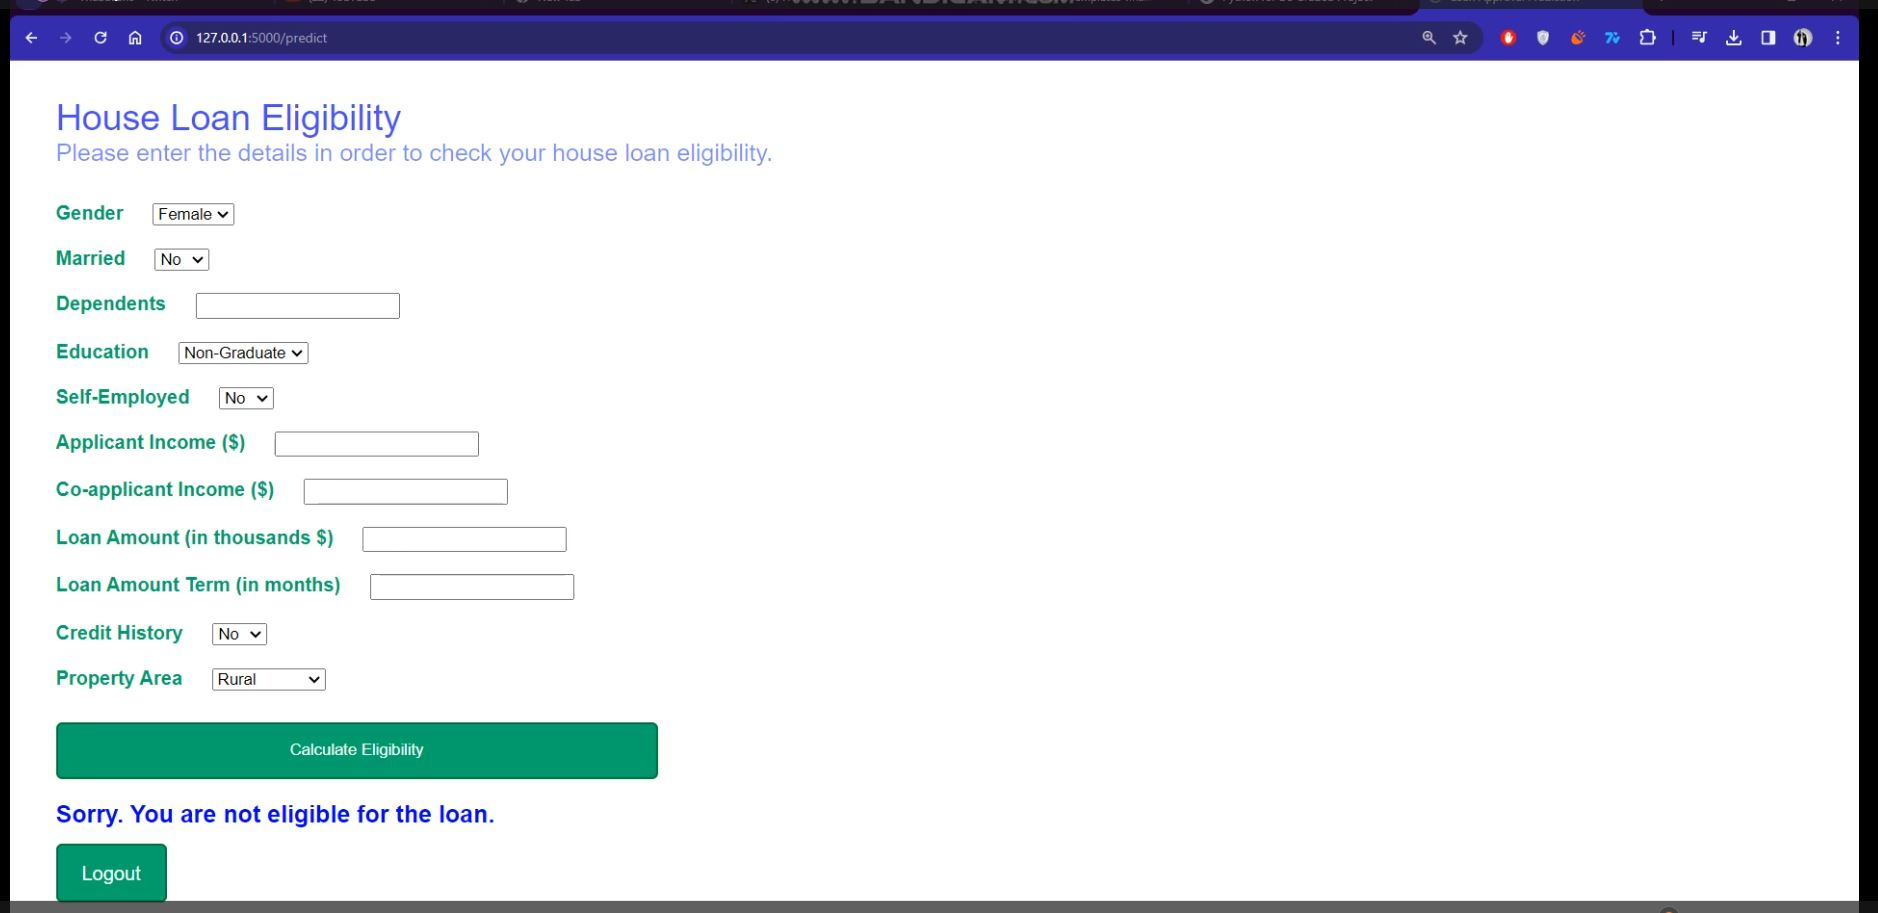

- Video of the whole process

<video src="Screenshots/App_Video.mp4" controls title="Title"></video>

- All the above screenshots and video are in the Screenshots video of the repo